<a href="https://colab.research.google.com/github/srujanay18/eda_assignment/blob/main/FINAL_A2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

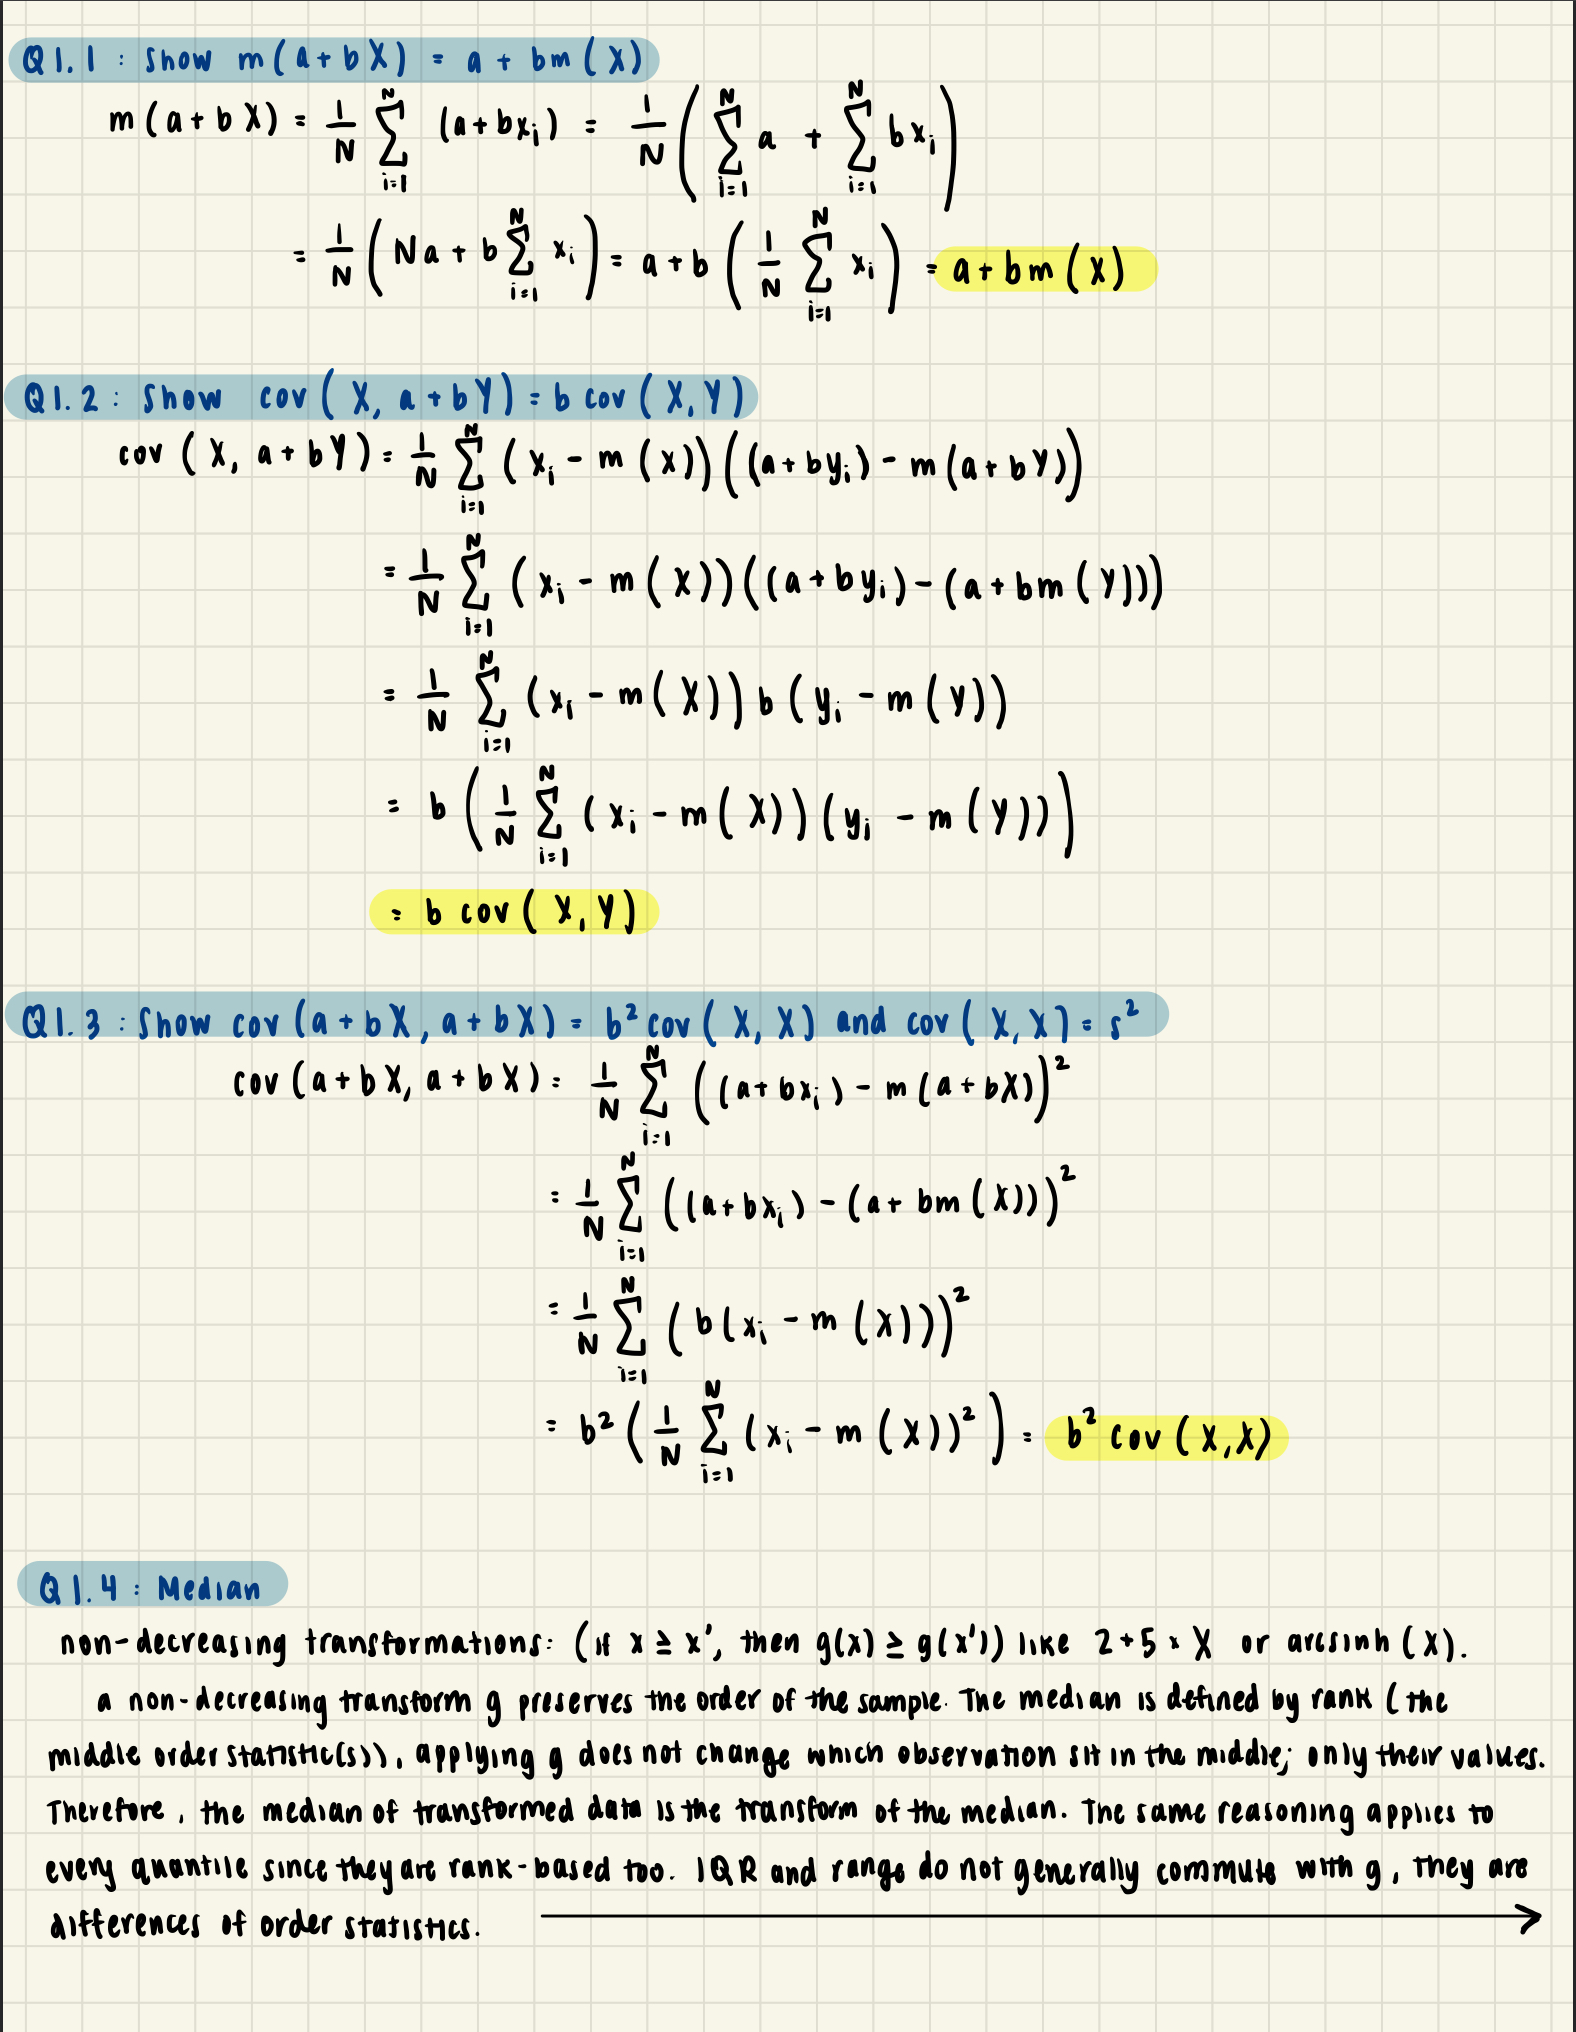## Q1:



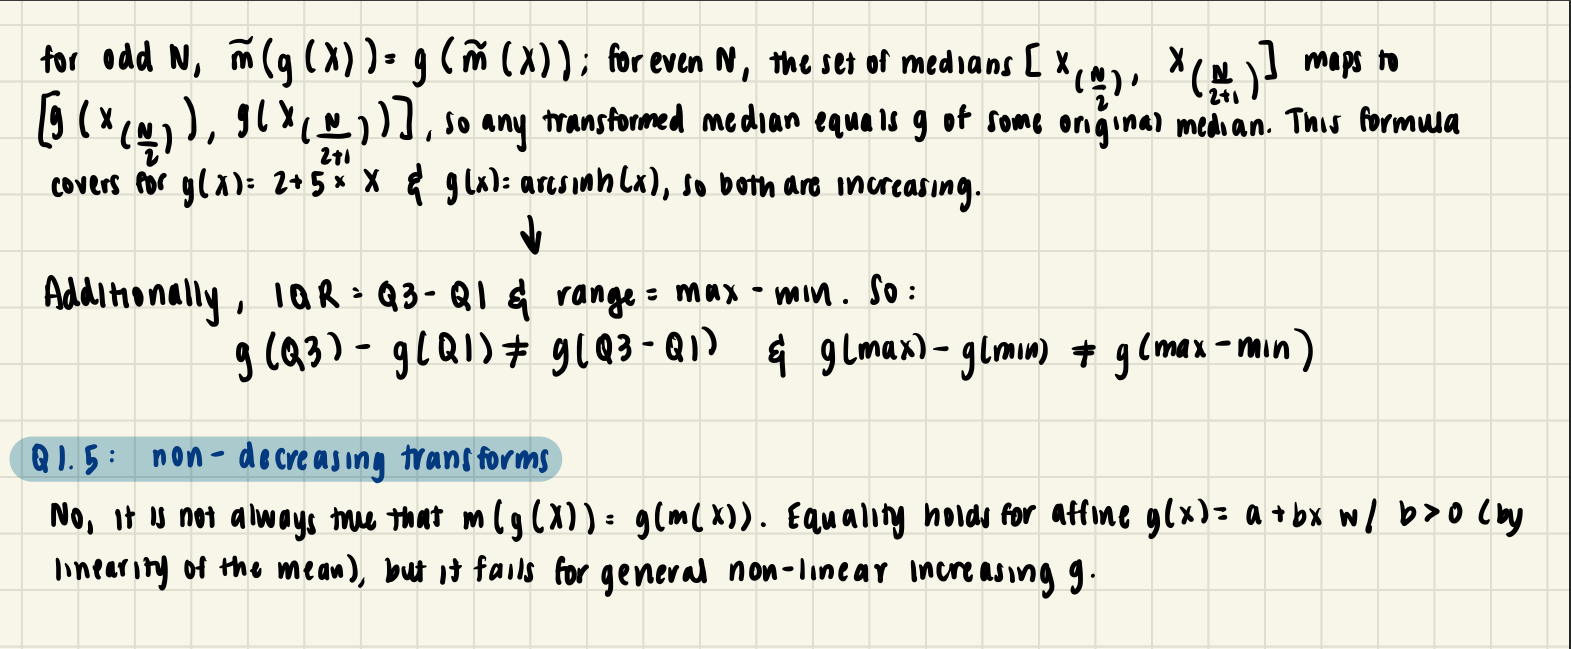

## Q2: This question uses the Airbnb data to practice making visualizations.

1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.
5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [1]:
# 1. Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airbnb = pd.read_csv('/content/airbnb_hw.csv')


In [2]:
# 2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
print(len(airbnb))
print(airbnb.shape)
print(airbnb.dtypes)
print(airbnb.columns)
print(airbnb.count)
print(airbnb.nunique)
print(airbnb.head())

30478
(30478, 13)
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
<bound method DataFrame.count of         Host Id Host Since                                Name Neighbourhood   \
0       5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1      33134899        

The dimensions of the data are that there are 30478 rows and 13 columns in the dataset. There are 30478 different observations in the dataset. The variables included are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', and 'Review Scores Rating'.

In [3]:
# 3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


When looking at the kinds of rentals available, Apartment had the largest numbers across all types of rooms. However, the property types with the lowest available room types were Cabin's, Castle's, Chalet's, Hut's, Lighthouse. The properties wehre private rooms are more common than renting the entire property were Bed & Breakfast, Castle, Chalet, Dorm, House, Hut, Other, Townhouse, and Treehouse.

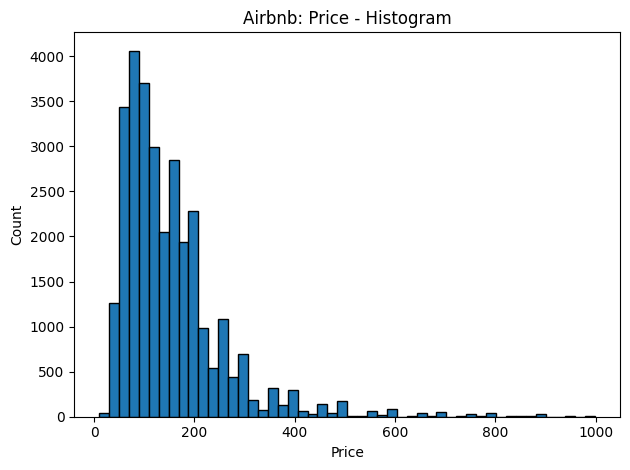

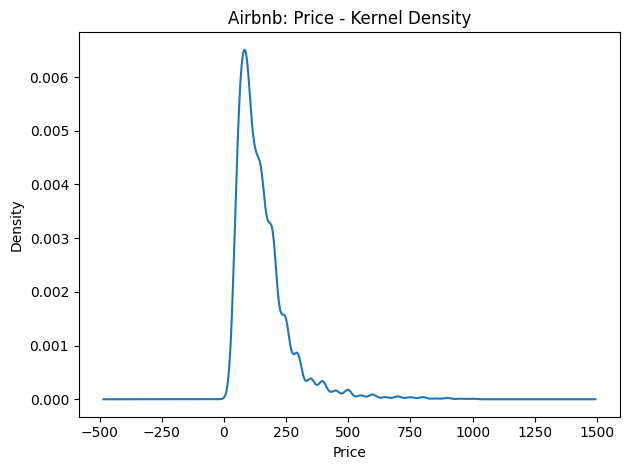

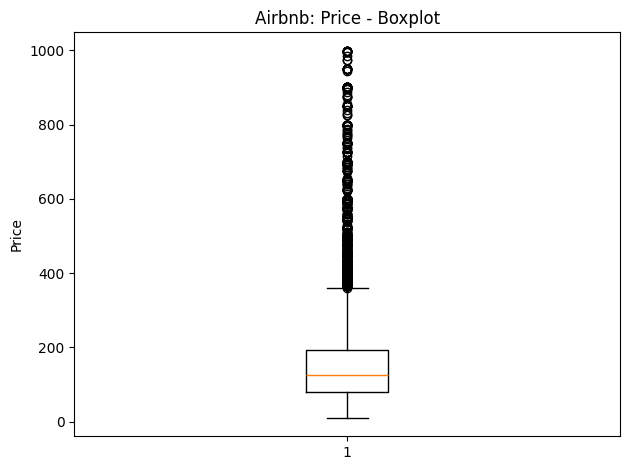

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
50%        125.000000
75%        192.000000
90%        270.000000
95%        350.000000
99%        600.000000
max        999.000000
Name: Price, dtype: float64

price_log description:
 count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
50%          4.828314
75%          5.257495
90%          5.598422
95%          5.857933
99%          6.396930
max          6.906755
Name: price_log, dtype: float64


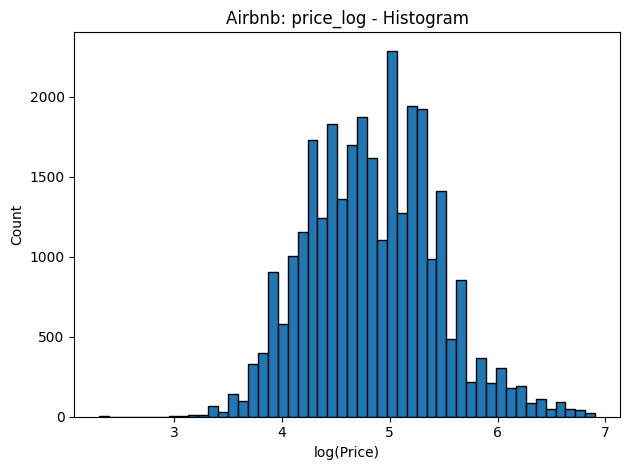

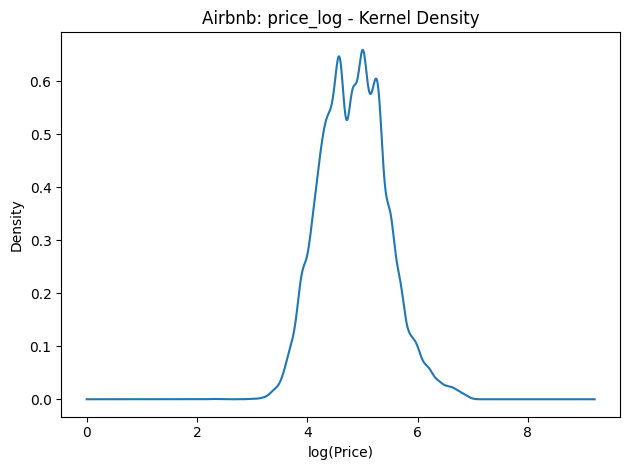

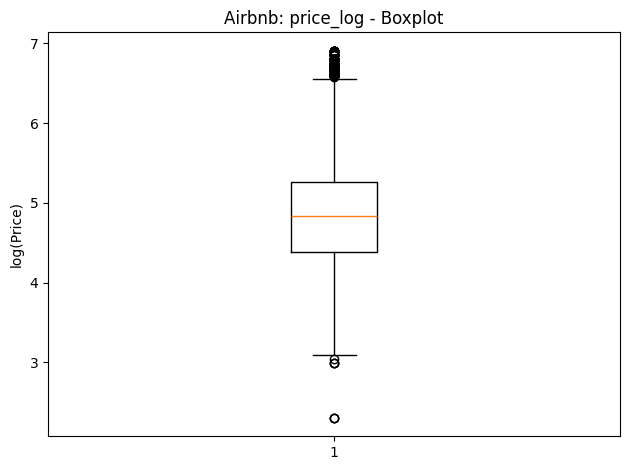

In [4]:
# 4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers?
# Use log to transform price into a new variable, price_log, and take these steps again.

# Convert 'Price' to numeric, coercing errors to NaN
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors='coerce')

# histogram
plt.figure()
airbnb["Price"].dropna().plot(kind="hist", bins=50, edgecolor="black")
plt.title("Airbnb: Price - Histogram")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# kernel density
plt.figure()
airbnb["Price"].dropna().plot(kind="kde")
plt.title("Airbnb: Price - Kernel Density")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

# boxplot
plt.figure()
plt.boxplot(airbnb["Price"].dropna(), vert=True)
plt.title("Airbnb: Price - Boxplot")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


# statistical description of variable
price_desc = airbnb["Price"].describe(percentiles=[0.5,0.75,0.9,0.95,0.99])
print(airbnb.shape)
print(airbnb.columns)
print(price_desc)


# log transformation
airbnb["price_log"] = np.log(airbnb["Price"].where(airbnb["Price"]>0))
price_log_desc = airbnb["price_log"].describe(percentiles=[0.5,0.75,0.9,0.95,0.99])
print("\nprice_log description:\n", price_log_desc)

plt.figure()
airbnb["price_log"].plot(kind="hist", bins=50, edgecolor="black")
plt.title("Airbnb: price_log - Histogram")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure()
airbnb["price_log"].dropna().plot(kind="kde")
plt.title("Airbnb: price_log - Kernel Density")
plt.xlabel("log(Price)")
plt.tight_layout()
plt.show()

plt.figure()
plt.boxplot(airbnb["price_log"].dropna(), vert=True)
plt.title("Airbnb: price_log - Boxplot")
plt.ylabel("log(Price)")
plt.tight_layout()
plt.show()

THe data is badly scaled with a lot of outliers, prior to log transformation.

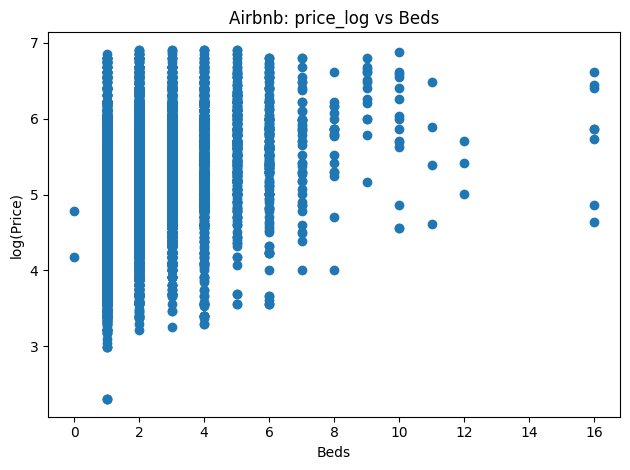

      count        mean         std  median    min    max
Beds                                                     
0.0       2   92.000000   38.183766    92.0   65.0  119.0
1.0   20307  124.757670   75.685752   100.0   10.0  950.0
2.0    6561  186.702332  115.044205   160.0   25.0  999.0
3.0    2029  234.928043  142.288189   200.0   26.0  999.0
4.0     766  280.554830  175.512312   240.0   27.0  999.0
5.0     274  322.000000  190.319415   285.0   35.0  995.0
6.0     166  316.313253  201.157585   271.0   35.0  900.0
7.0      45  341.377778  220.116631   300.0   55.0  900.0
8.0      20  331.850000  155.652202   339.5   55.0  750.0
9.0      14  587.142857  208.351721   625.0  175.0  900.0
10.0     15  442.200000  263.926992   400.0   95.0  975.0
11.0      4  332.250000  236.798613   289.5  100.0  650.0
12.0      3  225.000000   75.000000   225.0  150.0  300.0
16.0      8  402.250000  235.093143   350.0  104.0  750.0


In [5]:
# 5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.
# Describe any patterns you see in the average price and standard deviation in prices.

# scatterplot
plt.figure()
plt.scatter(airbnb["Beds"], airbnb["price_log"])
plt.title("Airbnb: price_log vs Beds")
plt.xlabel("Beds")
plt.ylabel("log(Price)")
plt.tight_layout()
plt.show()

# groupby
by_beds = airbnb.groupby("Beds", dropna=True)["Price"].agg(["count","mean","std","median","min","max"]).sort_index()
print(by_beds)


When looking at the scatterplot, most listings are 1-2 beds. Additionally, as the Beds increases, the log(Price) shifts upward. When the spread in log(Price) widens, the Beds increase. There are a lot more outliers near the 6.5-6.9 log(Price) range, scattered at mostly higher bed counts, and lower number of log(Price) outliers near the lower left.


When looking at the table, the Beds with the highest counts are 1.0. As Beds increase, the count decreases. However, the mean is different. The Beds with the higest mean is 9.0 and with the lowest mean is 0.0. The Bed with the highest std is 10.0 and lowest std is 0.0. The Bed with the highest median is 9.0 and with the lowest mean is 0.0. The Bed with the lowest min value is 1.0 and the highest min value is 9.0. The Bed with the lowest max value is 12.0 and the highest max value is 2.0 - 4.0. As the Bed increases, the mean increases till it hits the 9.0 Bed, from there it decreases, till it shoots up once again for 16.0 Bed. For standard deviation, std increases till it hits 7.0 Bed, where it starts to fluctuate till Bed 11.0, but then drops randomly for Bed 12.0, but once again hits that 235 mark for 16.0 Bed.

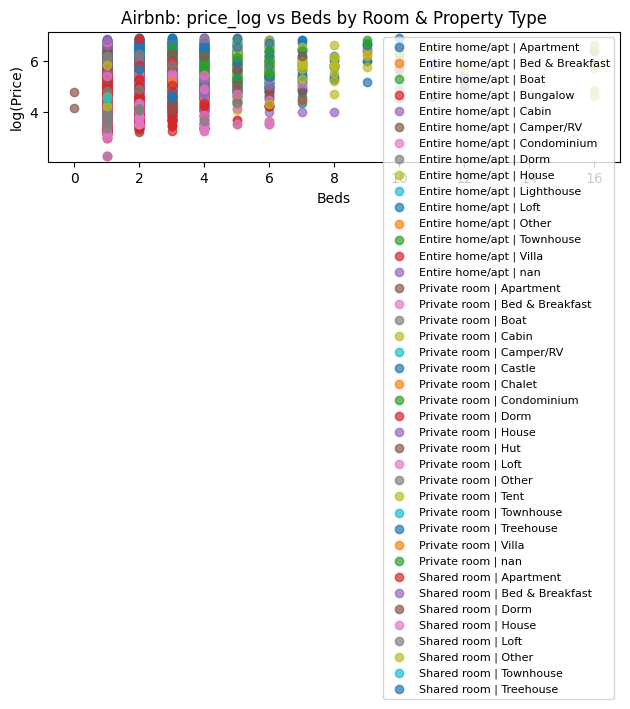

                                 count        mean         std  median    min  \
Room Type       Property Type                                                   
Entire home/apt Other               10  290.800000  273.526273   177.5   66.0   
                Loft               379  284.910290  184.515517   220.0   55.0   
                Condominium         71  281.126761  175.313998   200.0   80.0   
                Cabin                1  250.000000         NaN   250.0  250.0   
                Townhouse           81  242.037037  166.755243   189.0   66.0   
                House              723  234.554633  159.785974   188.0   27.0   
                Villa                3  206.333333   89.667906   200.0  120.0   
                Apartment        15550  200.210161  109.967435   175.0   10.0   
                Bed & Breakfast     13  184.538462  119.814172   130.0   85.0   
Private room    Other               28  176.642857  141.484252   114.0   39.0   
Shared room     Treehouse   

In [6]:
# 6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see?
# Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average?
# Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

# scatterplot
plt.figure()
groups = airbnb.groupby(["Room Type","Property Type"], dropna=False)
for (rt, pt), g in groups:
    plt.scatter(g["Beds"], g["price_log"], label=f"{rt} | {pt}", alpha=0.7)
plt.title("Airbnb: price_log vs Beds by Room & Property Type")
plt.xlabel("Beds")
plt.ylabel("log(Price)")
plt.legend(loc="best", fontsize=8)
plt.tight_layout()
plt.show()

# description
by_rt_pt = airbnb.groupby(["Room Type","Property Type"])["Price"].agg(["count","mean","std","median","min","max"]).sort_values("mean", ascending=False)
print(by_rt_pt)

When looking at the scatterplot, the most range in Price is when there is 1 Bed. Approximately, as the number of Beds increase, the range of prices decrease (caveat: I can only see till 9 Beds, as the key covers the rest of the visualization). The reason why there are 2 data points on the plot for 0 Beds is because they are both Camper/RV's with prices around log(4) - log(6). Overall though, since there are so many different types of property and room types, this type of scatterplot is much harder to interpret for all of those types offered.


When looking at the Property Type and Room type summary, the Room Type/Property Type with the highest average is the entire home/apt for Room type but the Property Type is Other; with an average value of 290.80 dollars. Again, the Room Type/Property Type with the highest standard deviation is the entire home/apt for Room type but the Property Type is Other; with a std of 273.53 dollars. The median seems to be a more useful estimate for central tendency because the prices seem to be skewed more heavily to the right (based on the max values). Additionally, the larger standard deviations are relative to the mean, but the median is a more reliable central tendency because it does not get influenced by outliers.



## Q3: This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load ./data/drilling_rigs.csv and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced?
Explain clearly how these data need to be cleaned.
2. To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed').
3. Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.


In [7]:
# 1. Load ./data/drilling_rigs.csv and examine the data.
# How many observations? How many variables?
# Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced?
# Explain clearly how these data need to be cleaned.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drill = pd.read_csv('/content/drilling_rigs.csv')

print(len(drill))
print(drill.shape)
print(drill.columns)
print(drill.dtypes)
# print(drill.head())



623
(623, 10)
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)          

There are 623 observations and 10 variables. Not all the numeric variables are correctly read in by Pandas, some have to be typecast/coerced. Besides Month, Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs), Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs), and Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs), all the other variables need to be typecasted from type object to type int64.

In [8]:
# 2.  To convert the Month variable to an ordered datetime variable,
# use df['time'] = pd.to_datetime(df['Month'], format='mixed').

drill["time"] = pd.to_datetime(drill["Month"], format="mixed")

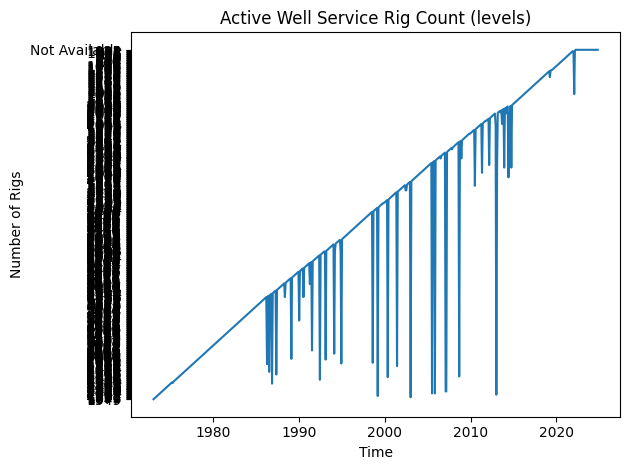

In [9]:
# 3. Let's look at Active Well Service Rig Count (Number of Rigs),
# which is the total number of rigs over time.
# Make a line plot of this time series. Describe what you see.

target = "Active Well Service Rig Count (Number of Rigs)"

plt.figure()
plt.plot(drill["time"], drill[target])
plt.title("Active Well Service Rig Count (levels)")
plt.xlabel("Time"); plt.ylabel("Number of Rigs")
plt.tight_layout()
plt.show()


This time series line plot is very hard to read/interpret. We know that between 19886 - 2015, that is the main range of Active Well Service Rig Count Number of Rigs. However, there are outliers during the year 2018 and 2022. We are unable to properly read the number of rigs during each year.

In [10]:
num_cols = [c for c in drill.columns if c != "Month"]
for c in num_cols:
    s = drill[c].astype(str).str.replace(",", "", regex=False)
    s = s.replace({"Not Available": np.nan, "NA": np.nan, "": np.nan})
    drill[c] = pd.to_numeric(s, errors="coerce")

drill["time"] = pd.to_datetime(drill["Month"], format="mixed")

drill = drill.sort_values("time")

target = "Active Well Service Rig Count (Number of Rigs)"
assert pd.api.types.is_numeric_dtype(drill[target]), drill[target].dtype

drill["diff_rigs"] = drill[target].diff()

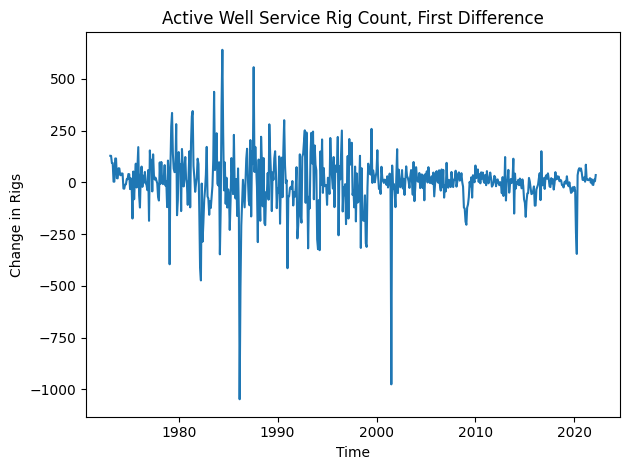

In [11]:
# 4. Instead of levels, we want to look at change over time.
# Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time.
# Describe what you see.

drill["diff_rigs"] = drill[target].diff()

plt.figure()
plt.plot(drill["time"], drill["diff_rigs"])
plt.title("Active Well Service Rig Count, First Difference")
plt.xlabel("Time"); plt.ylabel("Change in Rigs")
plt.tight_layout()
plt.show()

When looking at the change in rigs, this plot is much easier to interpret. There is a lot of variability till the year 2001. The highest change in rigs was above 500 during the year 1984 but the lowest change in rigs was over -1000 during the year 1986. Past 2001, it seems that the change in rigs was not that drastic.

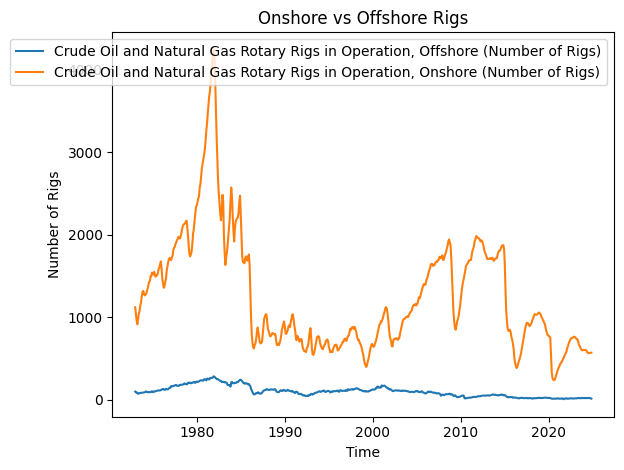

In [12]:
# 5. The first two columns are the number of onshore and offshore rigs, respectively.
# Melt these columns and plot the resulting series.
onshore_col = drill.columns[1]
offshore_col = drill.columns[2]
long = drill.melt(id_vars="time", value_vars=[onshore_col, offshore_col],
               var_name="series", value_name="value")
plt.figure()
for name, g in long.groupby("series"):
    plt.plot(g["time"], g["value"], label=name)
plt.title("Onshore vs Offshore Rigs")
plt.xlabel("Time"); plt.ylabel("Number of Rigs")
plt.legend()
plt.tight_layout()
plt.show()